<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/algorithm/RANSAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 直線フィッティング

誤差分布は外れ値が大きいコーシー分布

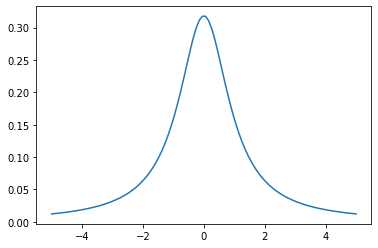

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def cauchy(x: np.ndarray):
    return 1/np.pi/(1+x*x)

x = np.linspace(-5, 5, 100)
y = cauchy(x)

plt.plot(x, y)
plt.show()

サンプルデータ生成

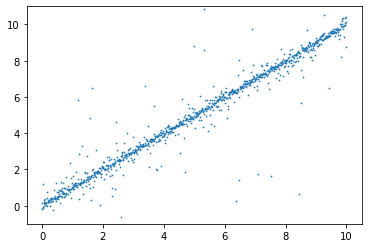

In [2]:
point_num: int = 1000

errors = np.random.standard_cauchy(point_num)
x = np.linspace(0, 10, point_num)
y = x + errors / 10

points = np.vstack([x, y]).T

plt.scatter(x, y, s=0.5)
plt.ylim(-1, 11)
plt.show()

ランダムサンプリング

In [3]:
index_mat = np.random.randint(0, point_num, (point_num, 2))
print(index_mat)

[[906 152]
 [516 104]
 [551 503]
 ...
 [379 409]
 [527 351]
 [639  65]]


In [4]:
# 転置前の成分数は (axis, samples, points)
samples_tensor = np.array([x[index_mat], y[index_mat]]).transpose(1, 0, 2)

print(samples_tensor.shape)
print(samples_tensor)

(1000, 2, 2)
[[[9.06906907 1.52152152]
  [9.13772364 1.49725755]]

 [[5.16516517 1.04104104]
  [5.21376334 1.05935198]]

 [[5.51551552 5.03503504]
  [5.33319757 4.90599996]]

 ...

 [[3.79379379 4.09409409]
  [3.57372996 3.77368561]]

 [[5.27527528 3.51351351]
  [5.22756868 2.1289048 ]]

 [[6.3963964  0.65065065]
  [6.43557607 0.69560472]]]


傾きと切片計算

In [5]:
params_tensor = np.array([np.polyfit(sample[:, 0], sample[:, 1], 1) for sample in samples_tensor])

inlier の数を計算 → 最も良い候補を選択

In [6]:
def get_distances(params, points):
    y_est = params[0] * points[:, 0] + params[1]
    distances = np.abs(points[:, 1] - y_est)
    return distances

distances_tensor = np.array([
    get_distances(params, points) for params in params_tensor])

distance_th = 0.3
inlier_bool_tensor = np.array([
    distances < distance_th
    for distances in distances_tensor
])
inlier_num_array = np.array([
    np.sum(inlier_bool)
    for inlier_bool in inlier_bool_tensor
])

best_idx = np.argmax(inlier_num_array)
print(best_idx)

306


結果を確認

In [7]:
best_params = params_tensor[best_idx]
inlier_idx = np.arange(point_num)[inlier_bool_tensor[best_idx]]
outlier_idx = np.arange(point_num)[~inlier_bool_tensor[best_idx]]

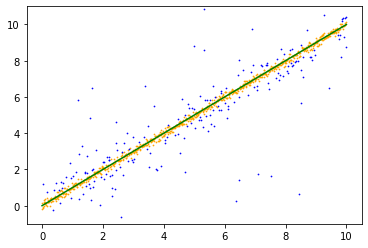

In [8]:
plt.scatter(points[inlier_idx, 0], points[inlier_idx, 1], s=0.5, color="orange")
plt.scatter(points[outlier_idx, 0], points[outlier_idx, 1], s=0.5, color="blue")

plt.plot(points[:, 0], best_params[0]*points[:, 0]+best_params[1],
         color="green")
plt.ylim(-1, 11)
plt.show()

再フィッティング

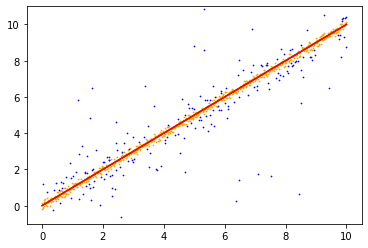

In [9]:
grad, line_slice = np.polyfit(points[inlier_idx, 0], points[inlier_idx, 1], 1)

plt.scatter(points[inlier_idx, 0], points[inlier_idx, 1], s=0.5, color="orange")
plt.scatter(points[outlier_idx, 0], points[outlier_idx, 1], s=0.5, color="blue")
plt.plot(points[:, 0], best_params[0]*points[:, 0]+best_params[1],
         color="green")
plt.plot(points[:, 0], grad*points[:, 0]+line_slice,
         color="red")
plt.ylim(-1, 11)
plt.show()

## 2次曲線フィッティング

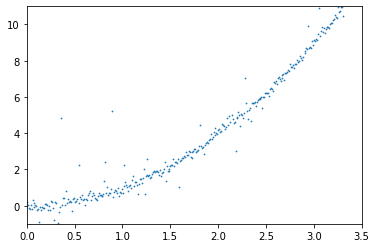

In [10]:
point_num: int = 1000

errors = np.random.standard_cauchy(point_num)
x = np.linspace(0, 10, point_num)
y = x**2 + errors / 10

points = np.vstack([x, y]).T

plt.scatter(x, y, s=0.5)
plt.xlim(0, 3.5)
plt.ylim(-1, 11)
plt.show()

In [14]:
index_mat = np.random.randint(0, point_num, (point_num, 3))
# 転置前の成分数は (axis, samples, points)
samples_tensor = np.array([x[index_mat], y[index_mat]]).transpose(1, 2, 0)
print(samples_tensor.shape)

(1000, 3, 2)


In [15]:
params_tensor = np.array([
    np.polyfit(sample[:, 0], sample[:, 1], 2)
    for sample in samples_tensor])

<ipython-input-15-5d1e57feb8fb>:1: RankWarning: Polyfit may be poorly conditioned
  params_tensor = np.array([
<ipython-input-15-5d1e57feb8fb>:1: RankWarning: Polyfit may be poorly conditioned
  params_tensor = np.array([
<ipython-input-15-5d1e57feb8fb>:1: RankWarning: Polyfit may be poorly conditioned
  params_tensor = np.array([


In [16]:
def get_distances(params, points):
    y_est = params[0] * points[:, 0] + params[1]
    distances = np.abs(points[:, 1] - y_est)
    return distances

distances_tensor = np.array([
    get_distances(params, points) for params in params_tensor])

distance_th = 0.3
inlier_bool_tensor = np.array([
    distances < distance_th
    for distances in distances_tensor
])
inlier_num_array = np.array([
    np.sum(inlier_bool)
    for inlier_bool in inlier_bool_tensor
])

best_idx = np.argmax(inlier_num_array)